In [1]:
import fastai

In [2]:
print(fastai.__version__)

2.3.1


In [3]:
%matplotlib inline
from fastai.vision.all import *
from nbdev.showdoc import *

In [4]:
set_seed(2)
bs = 64

In [5]:
path = untar_data(URLs.PETS); path

Path('/home/gitpod/.fastai/data/oxford-iiit-pet')

In [6]:
Path.BASE_PATH = path # 显示相对于数据集根的所有路径
path.ls()

(#2) [Path('images'),Path('annotations')]

In [7]:
path_anno = path/'annotations'
path_img = path/'images'

In [8]:
fnames = get_image_files(path_img) # 获取部分文件名
fnames[:5]

(#5) [Path('images/British_Shorthair_201.jpg'),Path('images/Bengal_153.jpg'),Path('images/pomeranian_165.jpg'),Path('images/boxer_110.jpg'),Path('images/Birman_123.jpg')]

In [9]:
# 数据处理
dls = ImageDataLoaders.from_name_re(
    path, fnames, pat=r'(.+)_\d+.jpg$', item_tfms=Resize(460), bs=bs,
    batch_tfms=[*aug_transforms(size=224, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])

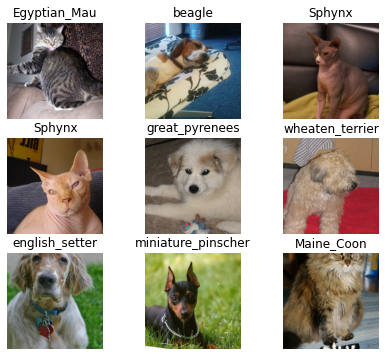

In [10]:
# 随机展示一下数据图片
dls.show_batch(max_n=9,figsize=(7,6))

In [11]:
print(dls.vocab) #查看所有标签
len(dls.vocab),dls.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [12]:
from ipywidgets import IntProgress
# 创建模型指定一些参数
learn = cnn_learner(dls, resnet34, metrics=error_rate).to_fp16()

In [13]:
# 查看模型
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [16]:
# 先训练4轮
learn.fit_one_cycle(1)

RuntimeError: DataLoader worker (pid(s) 10365) exited unexpectedly